In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##
Review table skills. 
Create a simplified table. 

In [ ]:
#Import all census data.
full = Table.read_table('nc-est2019-agesex-res.csv')
full

In [ ]:
# Keep only the columns sex, age, 2014 estimate, and the 2019 estimate.
partial = 
partial

In [ ]:
# Change the column title so they are easier to read. 
simple = partial.relabeled(2, '2014').relabeled(3, '2019')
simple

## Line Plots ##
Define a line plot



In [ ]:
# Remove the age totals
no_999 = simple.where('AGE', are.below(999))
no_999

In [ ]:
# Creat a line chart of the ages excluding the total category
overall = no_999.where('SEX', 0)
overall.plot('AGE', '2019')

#### What does this graph display? ####

#### What do you notice about the axes? ####

In [ ]:
#Understanding the plot command.
overall.plot?

### ^^ That plot should be labeled! Here are 3 ways to label it: ###


In [ ]:
# US Population  <--- Just add a comment

overall.plot('AGE', '2019')

In [ ]:
overall.plot('AGE', '2019')
print('US Population')  # <--- Print out what it is

In [ ]:
overall.plot('AGE', '2019')
plots.title('US Population');    

Which was your preferred title command and display?

What do you notice about the scale of the axes?

What observations or questions come up when reviewing this data?

### Males vs Females

In [ ]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [ ]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

In [ ]:
pop_2019.plot('Age')
plots.title("US Population: Male vs Female");

What do you notice about the scale of the axes?

What are some questions or observations you could make about this data?

In [ ]:
# Calculate the percent female for each age
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

In [ ]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

In [ ]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

In [ ]:
pop_2019.plot('Age', 'Percent female')

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think

pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for Data 8

Compare the two displays: Why do you think the program automatically zooms in?

What observations or questions can be formed about this data?

## Scatter Plots ##

Define a scatter plot.

In [ ]:
# Import Actors and their highest grossing movies data.
actors = Table.read_table('actors.csv')
actors

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

What observations can be made from comparing the two variables?

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')


What observations can be made from comparing the two variables?

In [ ]:
actors.where('Average per Movie', are.above(400))

Who is Anthony Daniels and why did he make so much for so few movies?

## Bar Charts ##
Define Bar Charts

In [ ]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

In [ ]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

In [ ]:
# Convert Adjusted Gross to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

In [ ]:
top10_adjusted.barh('Title', 'Millions')

Exercise: Generate the chart shown below: a bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted).
    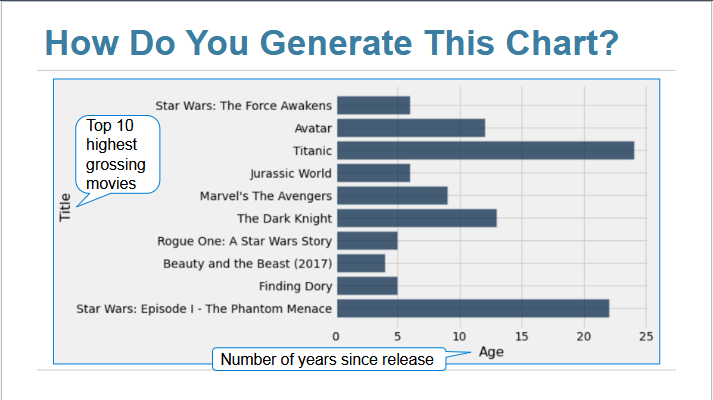

In [ ]:
# Use the Year column to find the age of the movie, then add that column to the top10_adjusted table.

In [ ]:
# Create a horizontal bar chart that displays the age of the movies